
# UNEMPLOYMENT ANALYSIS WITH PYTHON

    This project focuses on analyzing the unemployment rate, particularly the sharp increase during the Covid-19 pandemic.
    The analysis involves using Python to process and visualize unemployment data. 
    

In [6]:
#CODE:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pylab
from datetime import datetime
import plotly.express as px

#Normalize Data
from sklearn.preprocessing import StandardScaler

#Conert Categorical to Numerical Value
from sklearn.preprocessing import LabelEncoder

#Columns Relationship for target value
from sklearn.feature_selection import mutual_info_regression

#Splitting Data
from sklearn.model_selection import train_test_split,cross_val_score

#PCA
from sklearn.decomposition import PCA

#Model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

#Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
#from sklearn.metrics._plot.roc_curve import auc

# Data Collection:

    Gathering unemployment data from reliable sources such as government databases or public datasets and storing them in   "unemployment_data.csv" file


In [7]:
df = pd.read_csv("unemployment_data.csv")

# Size of the Data Frame :

    "df.shape" returns a tuple containing the shape of the DataFrame. 
    The shape is the number of rows and columns of the DataFrame.

In [8]:
print("data shape : ",df.shape)

data shape :  (20, 9)


# The info() method 
    The info() method prints information about the DataFrame.

    The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values).
    
    
    
    
    
    
    
    
    

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   20 non-null     object 
 1   Date                                     20 non-null     object 
 2   Frequency                                20 non-null     object 
 3   Estimated Unemployment Rate (%)          20 non-null     float64
 4   Estimated Employed                       20 non-null     int64  
 5   Estimated Labour Participation Rate (%)  20 non-null     float64
 6   Region.1                                 20 non-null     object 
 7   longitude                                20 non-null     float64
 8   latitude                                 20 non-null     float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.5+ KB


In [10]:
df.columns= ["States","Date","Frequency",
               "Estimated Unemployment Rate",
               "Estimated Employed",
               "Estimated Labour Participation Rate",
               "Region","longitude","latitude"]

# Returning Data
    The head() method is used to return a specified number of rows, string from the top.

In [11]:
df.head(20)

,States,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.7400
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.7400
2,Tamil Nadu,30-04-2020,M,21.34,12542356,34.25,South,11.1271,78.6569
3,Tamil Nadu,31-05-2020,M,18.23,14258945,37.85,South,11.1271,78.6569
4,Karnataka,31-01-2020,M,4.32,20534215,43.20,South,15.3173,75.7139
5,Karnataka,29-02-2020,M,4.67,20345678,42.98,South,15.3173,75.7139
6,Kerala,30-04-2020,M,15.45,12578945,36.14,South,10.8505,76.2711
7,Kerala,31-05-2020,M,13.23,13012456,37.80,South,10.8505,76.2711
8,Gujarat,31-01-2020,M,6.12,25874312,45.10,West,22.2587,71.1924
9,Gujarat,29-02-2020,M,5.89,25712345,44.89,West,22.2587,71.1924


# The describe() method :

    The describe() method returns description of the data in the DataFrame.

    The description contains these information for each column:

    count - The number of not-empty values.
    mean - The average (mean) value.
    std - The standard deviation.
    min - the minimum value.
    25% - The 25% percentile*.
    50% - The 50% percentile*.
    75% - The 75% percentile*.
    max - the maximum value.

In [12]:
df.describe()

,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,longitude,latitude
count,20.000000,2.000000e+01,20.000000,20.000000,20.000000
mean,11.936000,1.583320e+07,39.020000,21.188360,78.801160
std,6.226749,4.850482e+06,3.923971,7.218947,6.463588
min,4.320000,9.045678e+06,31.230000,10.850500,71.192400
25%,6.062500,1.256980e+07,36.130000,15.317300,75.341200
50%,10.450000,1.540230e+07,39.855000,22.622750,76.178350
75%,17.727500,1.797632e+07,41.532500,27.023800,79.740000
max,21.890000,2.587431e+07,45.100000,31.147100,92.937600


# **UNIVARIATE ANALYSIS**
    

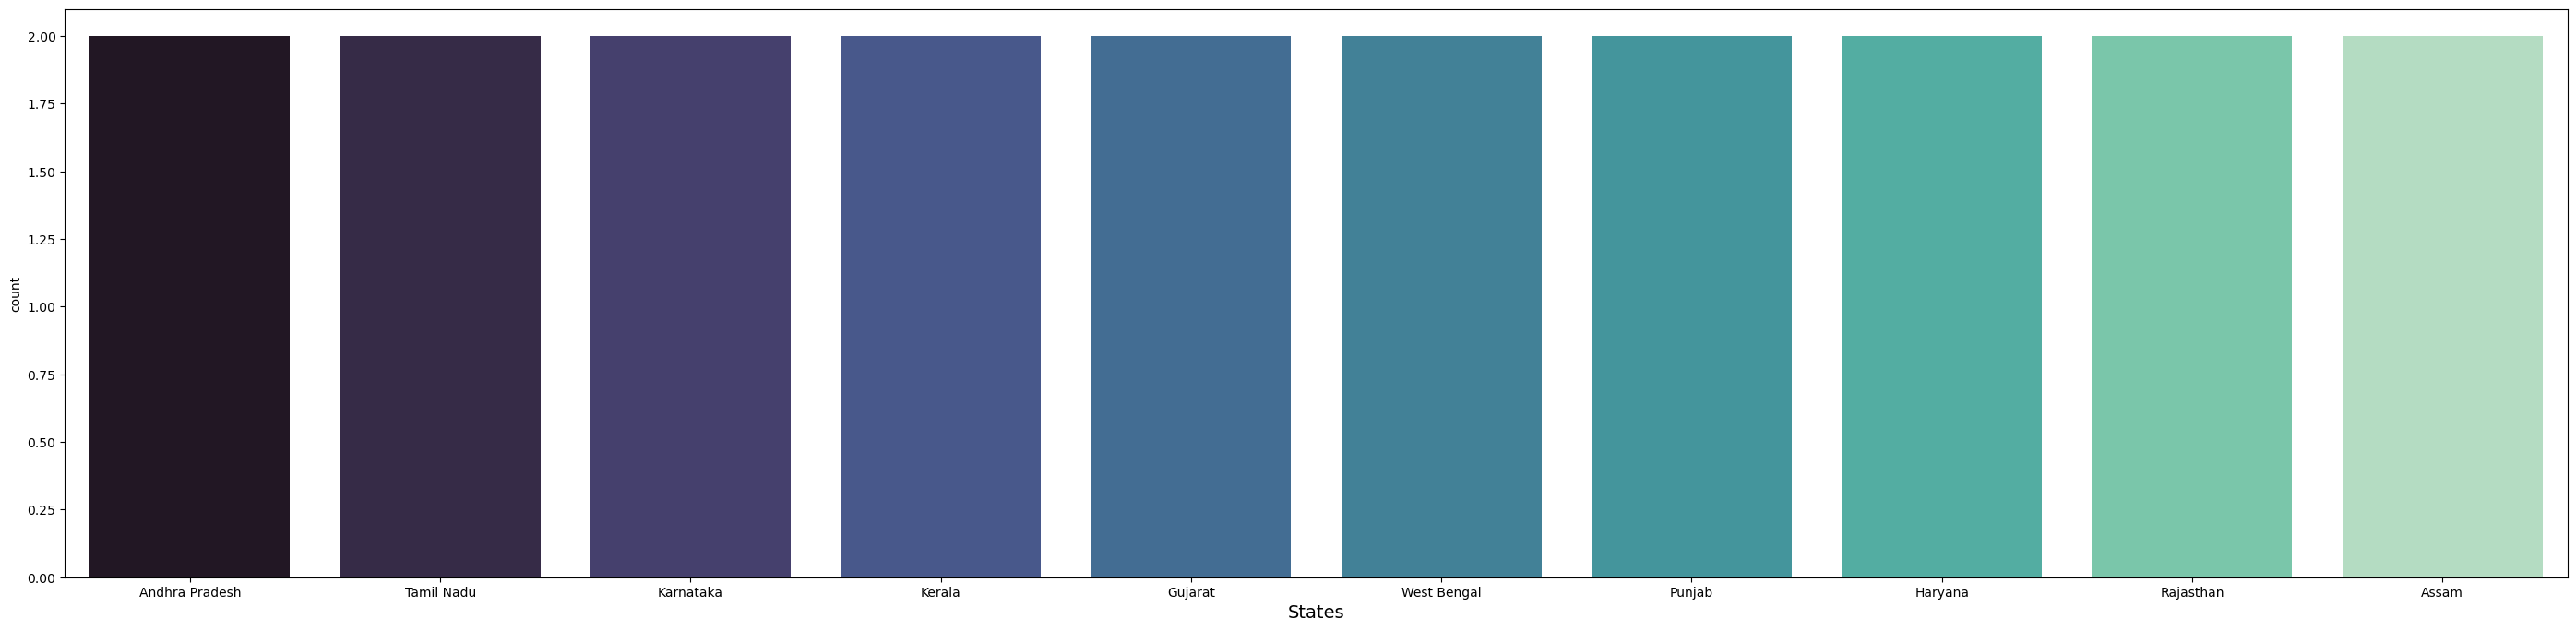

In [13]:
plt.figure(figsize=(35,8))
sns.countplot(x='States' , data=df ,palette='mako')
plt.xlabel('States', fontsize=14)
plt.show()

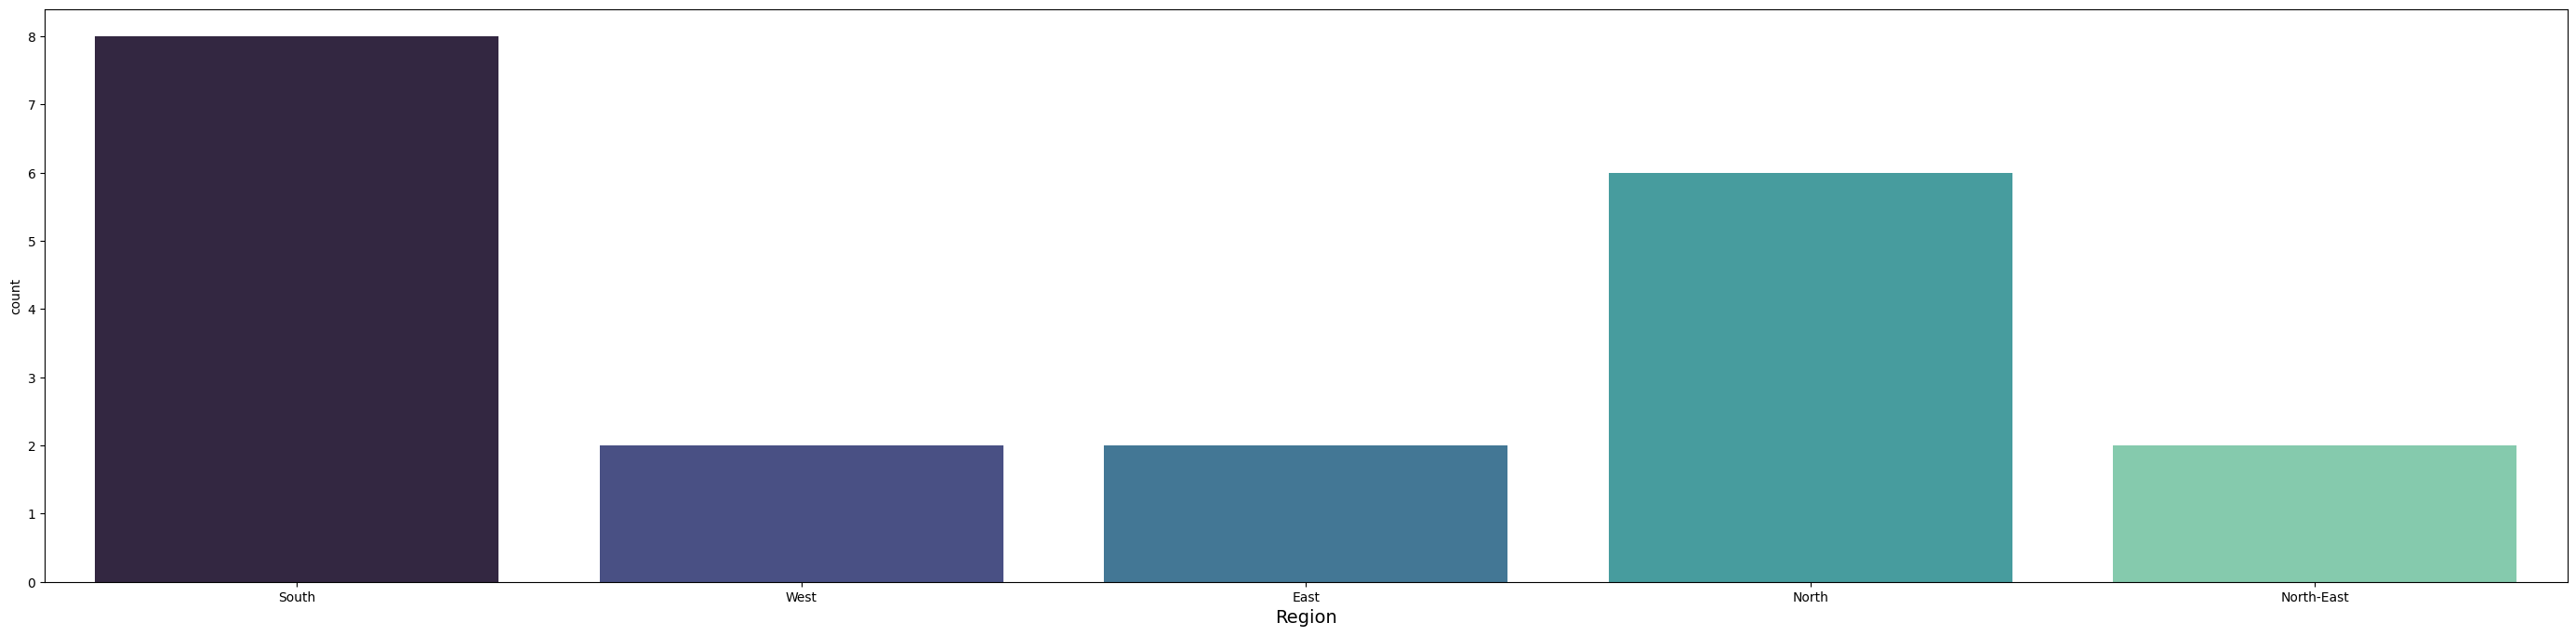

In [16]:
plt.figure(figsize=(35,8))
sns.countplot(x='Region' , data=df ,palette='mako')
plt.xlabel('Region', fontsize=14)
plt.show()

<Axes: xlabel='Estimated Unemployment Rate', ylabel='Count'>

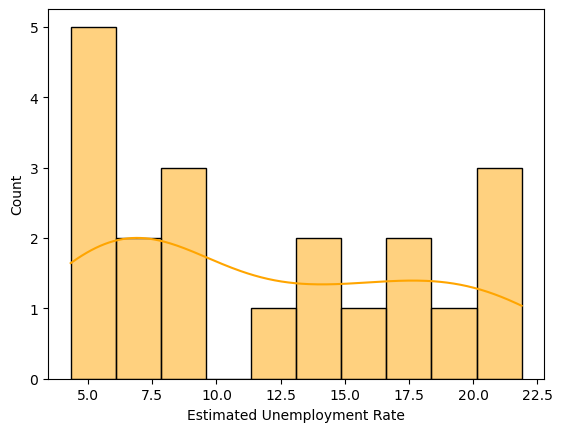

In [17]:
sns.histplot(df["Estimated Unemployment Rate"], kde=True, color="orange", bins=10)


<Axes: xlabel='Estimated Labour Participation Rate', ylabel='Count'>

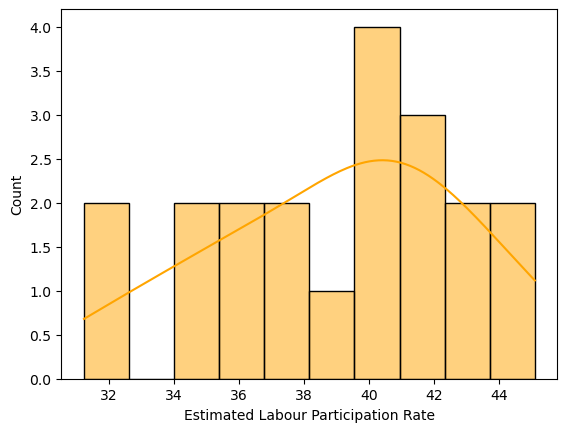

In [18]:
sns.histplot(df["Estimated Labour Participation Rate"], kde=True, color="orange", bins=10)


<Axes: xlabel='longitude', ylabel='Count'>

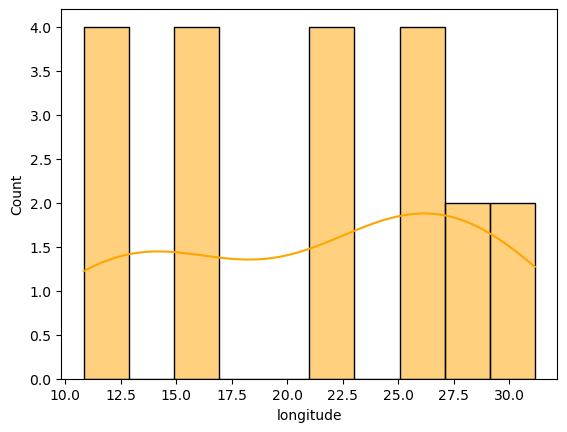

In [19]:
sns.histplot(df["longitude"], kde=True, color="orange", bins=10)


<Axes: xlabel='latitude', ylabel='Count'>

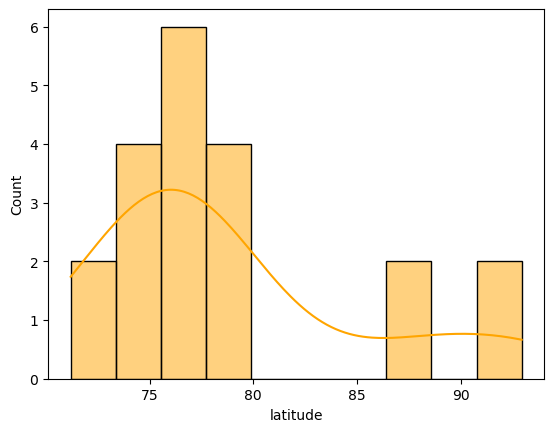

In [20]:
sns.histplot(df["latitude"], kde=True, color="orange", bins=10)


# **EDA (Exploratory Data Analysis)**

In [21]:
df.isnull().sum()

States                                 0
Date                                   0
Frequency                              0
Estimated Unemployment Rate            0
Estimated Employed                     0
Estimated Labour Participation Rate    0
Region                                 0
longitude                              0
latitude                               0
dtype: int64

# **Removing Outlier**

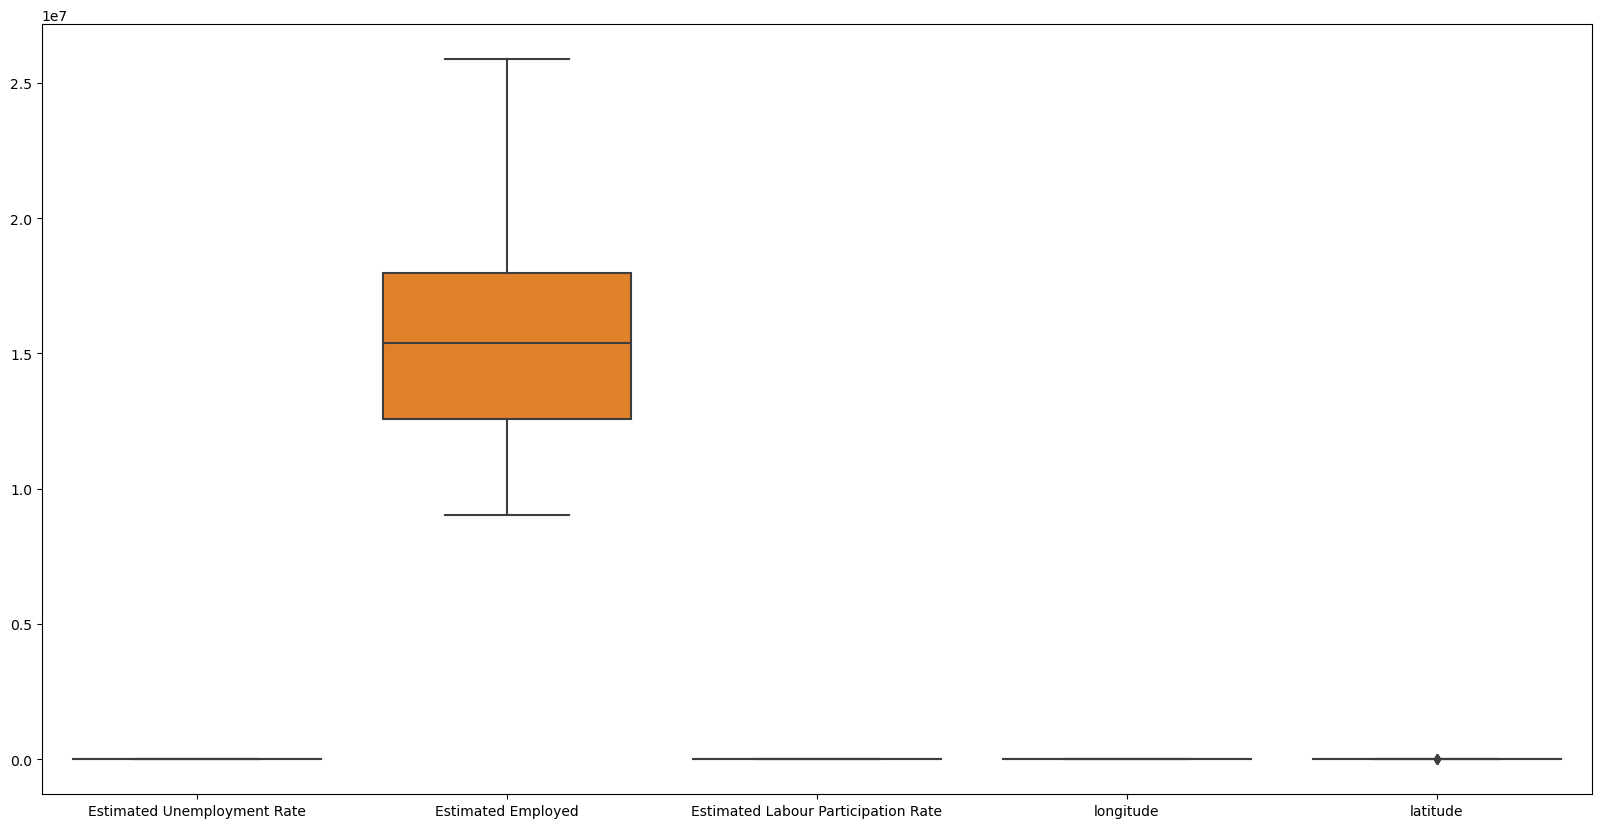

In [22]:
num_cols = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(20,10))
#num_cols.boxplot()
sns.boxplot(data=num_cols)
plt.show()

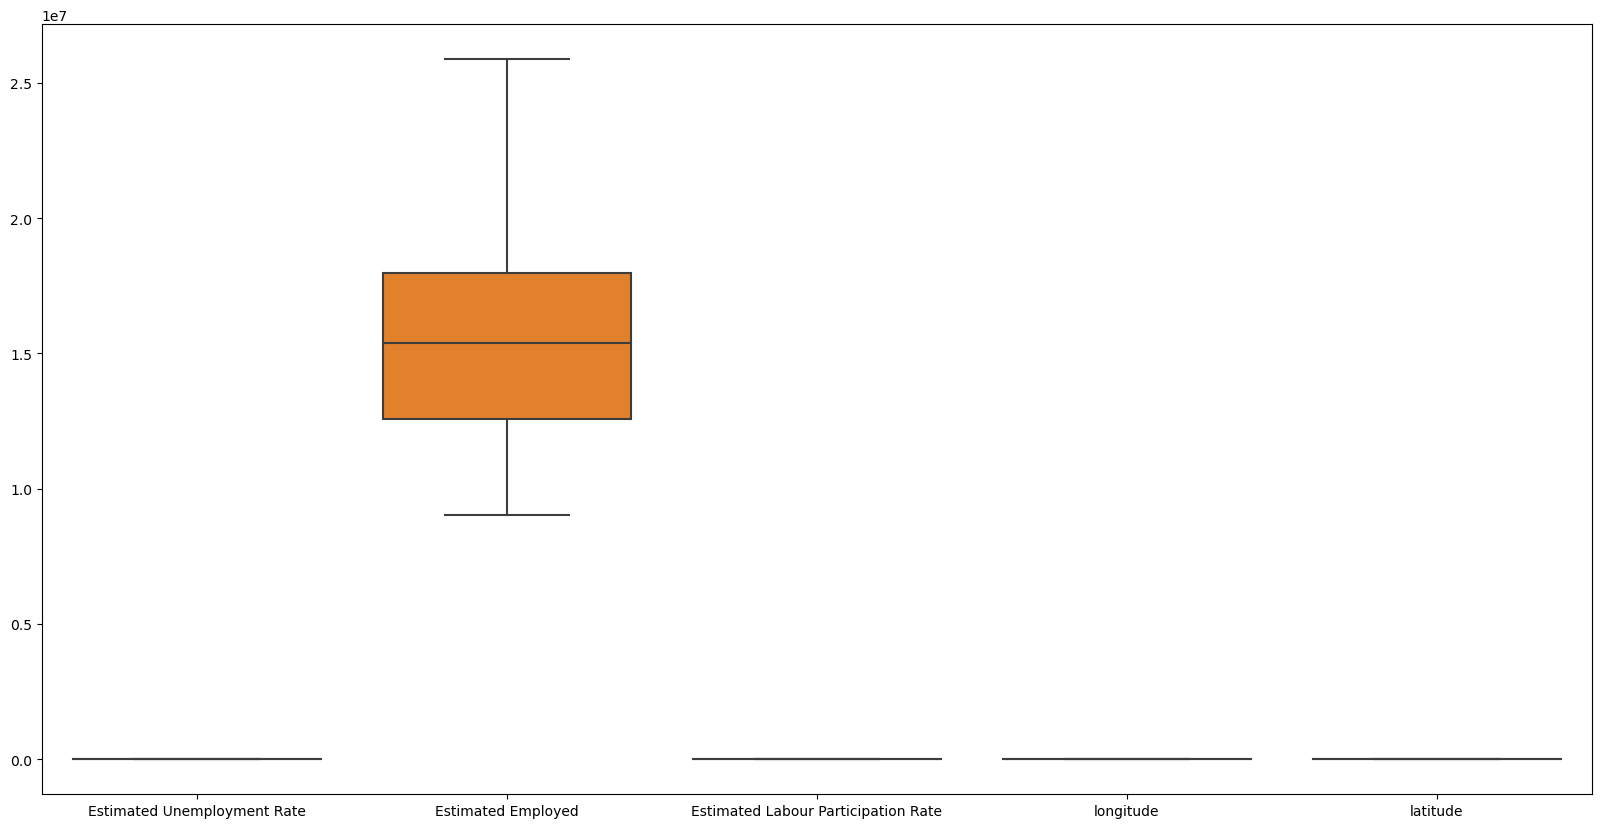

In [23]:
def remove_outlier(col):
  sorted(col)
  Q1,Q3 = col.quantile([0.25,0.75])
  IQR = Q3 - Q1
  lower_range = Q1 - (1.5 * IQR)
  upper_range = Q3 + (1.5 * IQR)
  return lower_range,upper_range

for i in num_cols.columns:
    lower_range,upper_range = remove_outlier(df[i])
    df[i] = np.where(df[i] > upper_range, upper_range, df[i])
    df[i] = np.where(df[i] < lower_range, lower_range, df[i])
    
#Check Outliers
num_cols = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(20,10))
#num_cols.boxplot()
sns.boxplot(data=num_cols)
plt.show()

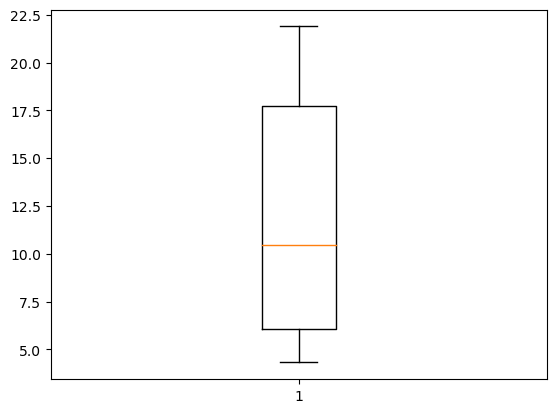

In [24]:
plt.boxplot(df["Estimated Unemployment Rate"])
plt.show()

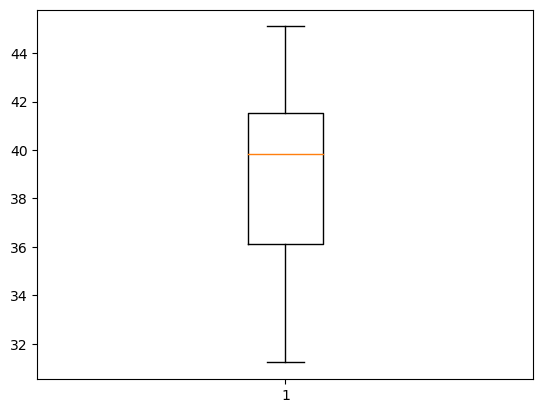

In [25]:
plt.boxplot(df["Estimated Labour Participation Rate"])
plt.show()

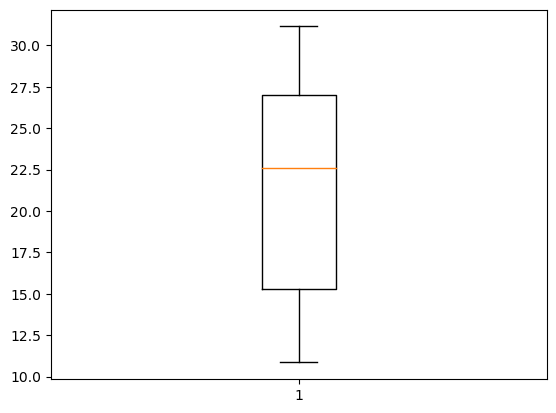

In [26]:
plt.boxplot(df["longitude"])
plt.show()

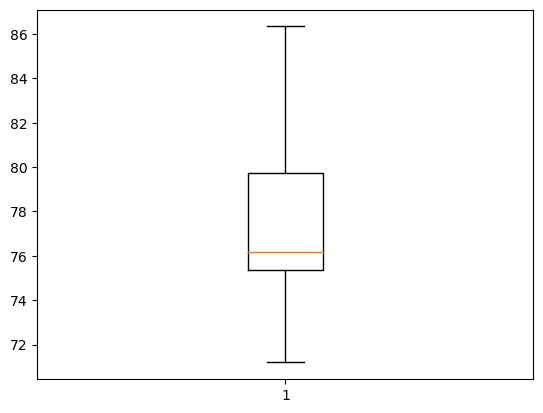

In [27]:
plt.boxplot(df["latitude"])
plt.show()

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   States                               20 non-null     object 
 1   Date                                 20 non-null     object 
 2   Frequency                            20 non-null     object 
 3   Estimated Unemployment Rate          20 non-null     float64
 4   Estimated Employed                   20 non-null     float64
 5   Estimated Labour Participation Rate  20 non-null     float64
 6   Region                               20 non-null     object 
 7   longitude                            20 non-null     float64
 8   latitude                             20 non-null     float64
dtypes: float64(5), object(4)
memory usage: 1.5+ KB


# **Bivaraite Analysis**

In [ ]:
# Bar plot of average Unemployment Rate by State

plot_ump = df[['Estimated Unemployment Rate', 'States']]
df_unemp = plot_ump.groupby('States').mean().reset_index()
df_unemp = df_unemp.sort_values('Estimated Unemployment Rate')
fig = px.bar(df_unemp, x='States', y='Estimated Unemployment Rate', color='States',
             title='Average Unemployment Rate in each state', template='plotly')
fig.show()

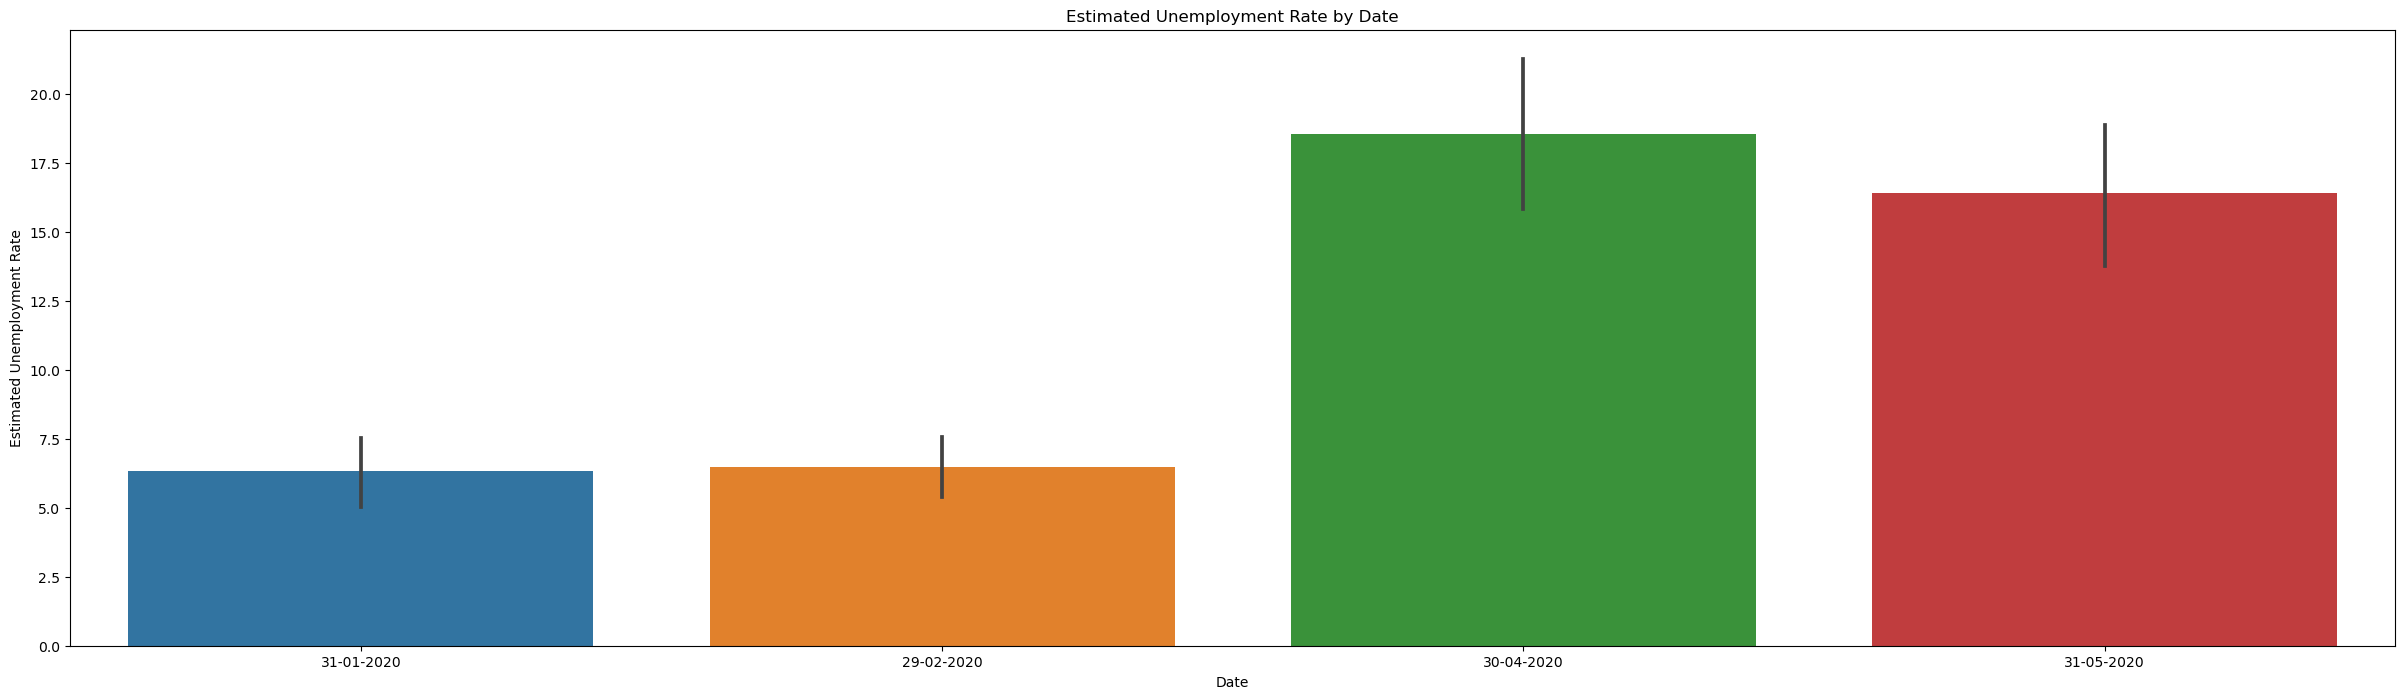

In [30]:
plt.figure(figsize=(30, 8))
sns.barplot(x='Date', y='Estimated Unemployment Rate', data=df)
plt.title('Estimated Unemployment Rate by Date')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate')
plt.show()

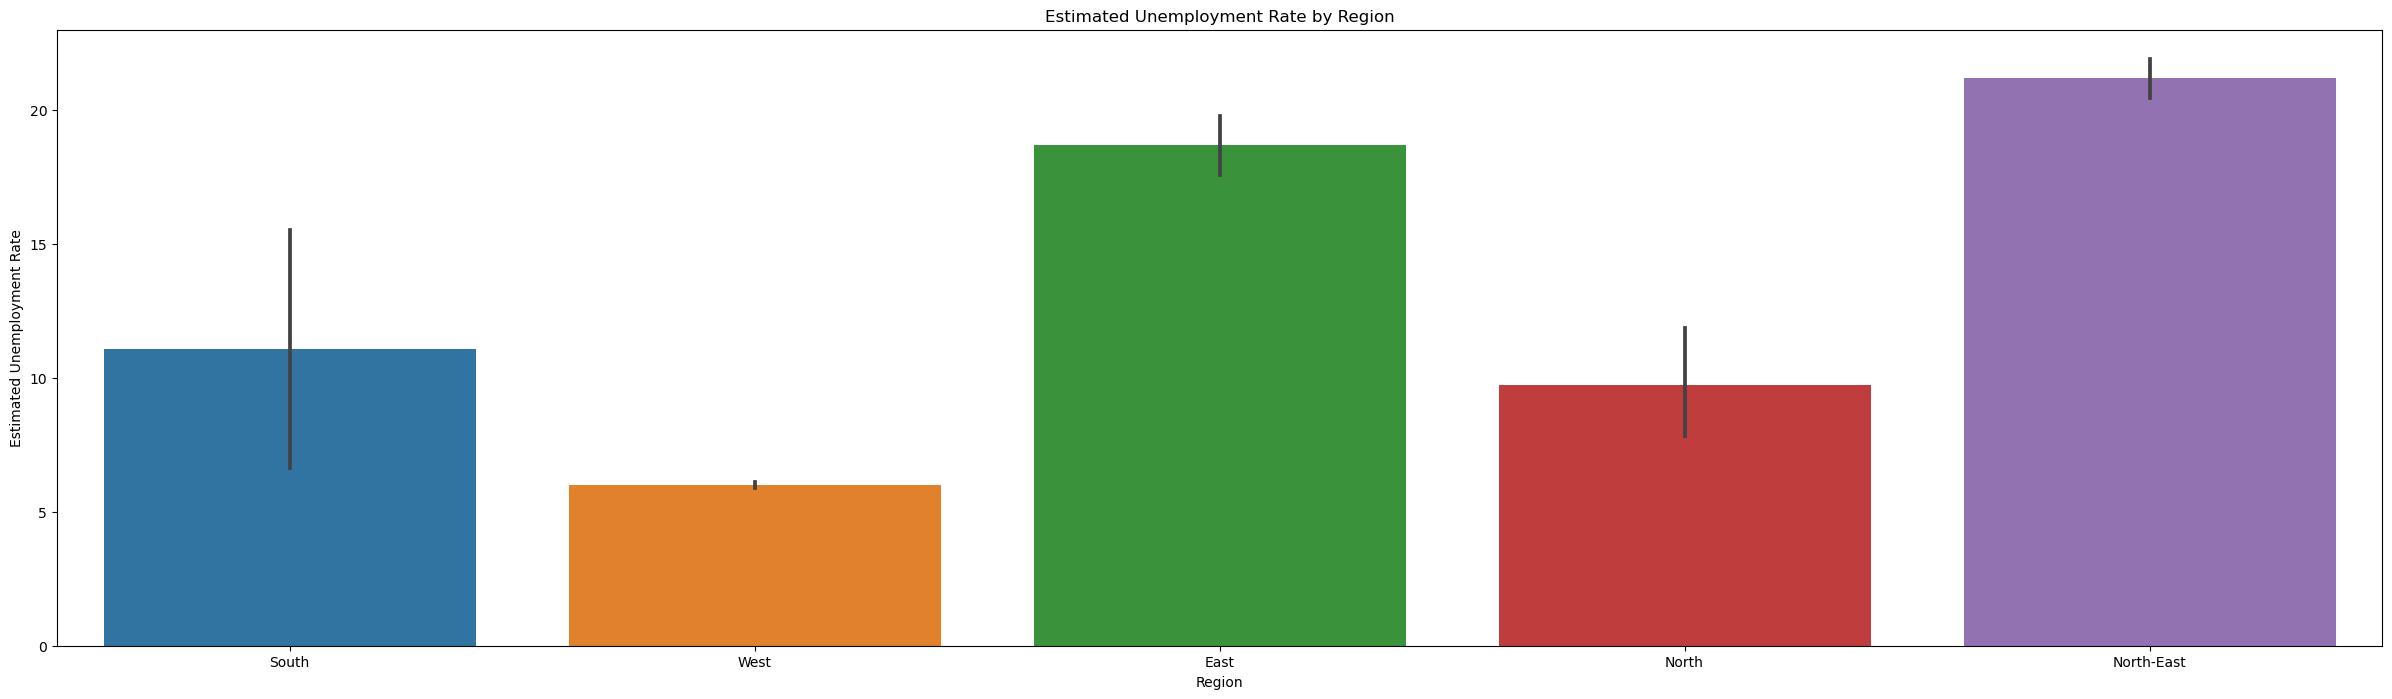

In [31]:
plt.figure(figsize=(30, 8))
sns.barplot(x='Region', y='Estimated Unemployment Rate', data=df)
plt.title('Estimated Unemployment Rate by Region')
plt.xlabel('Region')
plt.ylabel('Estimated Unemployment Rate')
plt.show()

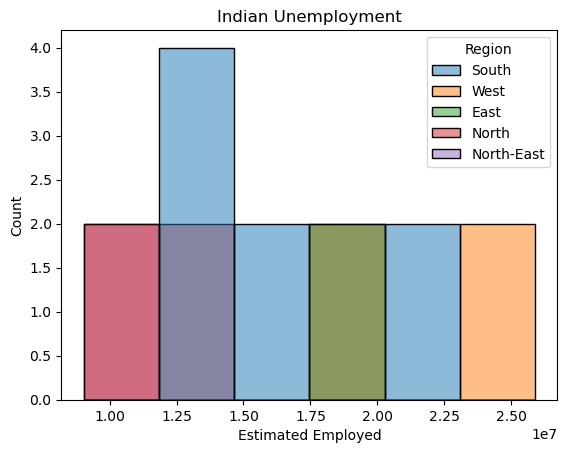

In [32]:
plt.title("Indian Unemployment")
sns.histplot(x="Estimated Employed", hue="Region", data=df)
plt.show()

In [33]:
unemploment = df[["States", "Region", "Estimated Unemployment Rate"]]
figure = px.sunburst(unemploment, path=["Region", "States"],
                     values="Estimated Unemployment Rate",
                     width=700, height=700, color_continuous_scale="RdY1Gn",
                     title="Unemployment Rate in India")
figure.show()

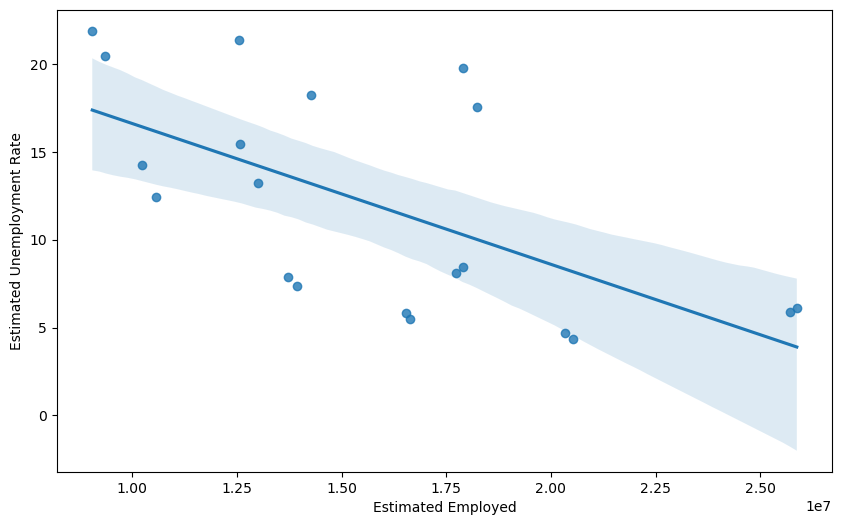

In [34]:
plt.figure(figsize=(10,6))
sns.regplot(x="Estimated Employed", y="Estimated Unemployment Rate", data=df)
plt.show()

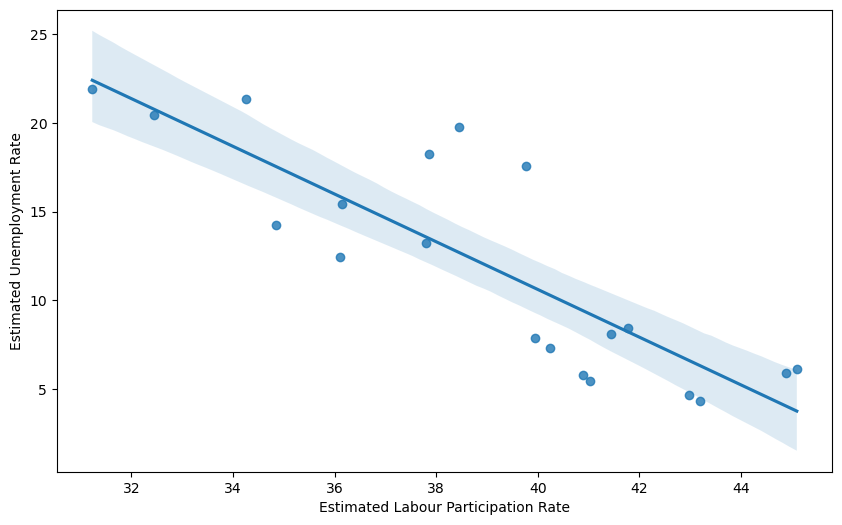

In [35]:
plt.figure(figsize=(10,6))
sns.regplot(x="Estimated Labour Participation Rate", y="Estimated Unemployment Rate", data=df)
plt.show()


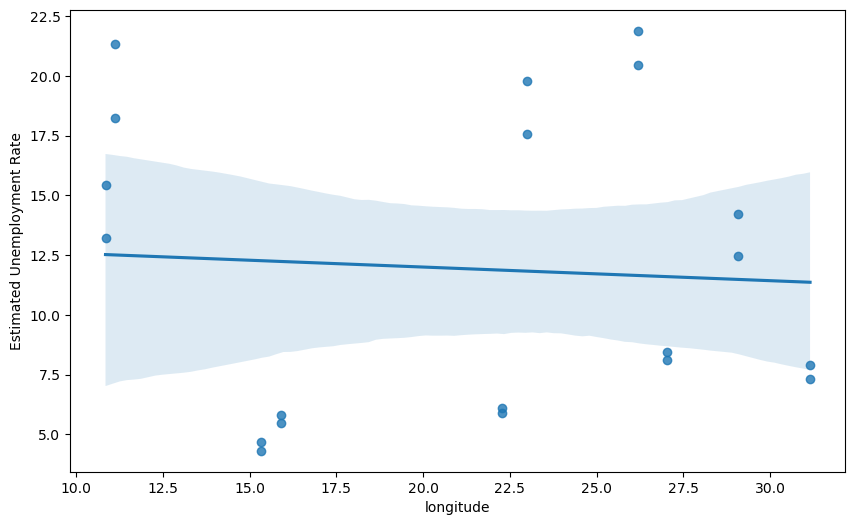

In [36]:
plt.figure(figsize=(10,6))
sns.regplot(x="longitude", y="Estimated Unemployment Rate", data=df)
plt.show()

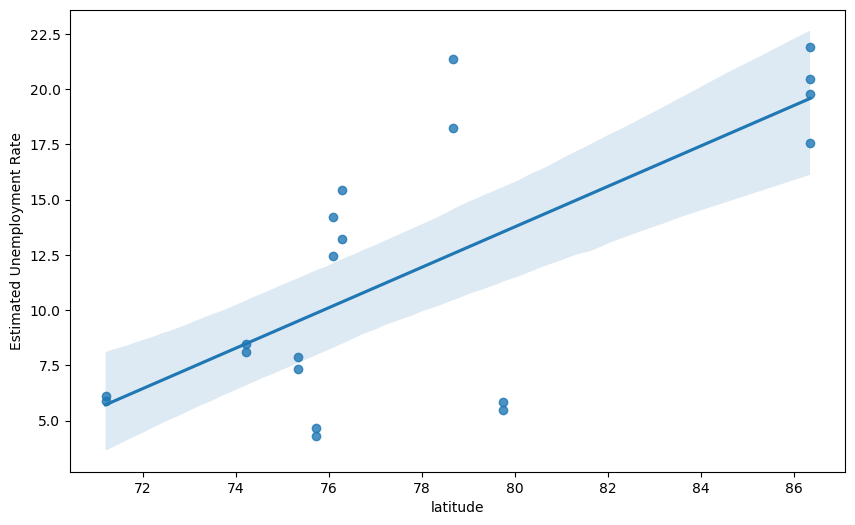

In [37]:
plt.figure(figsize=(10,6))
sns.regplot(x="latitude", y="Estimated Unemployment Rate", data=df)
plt.show()

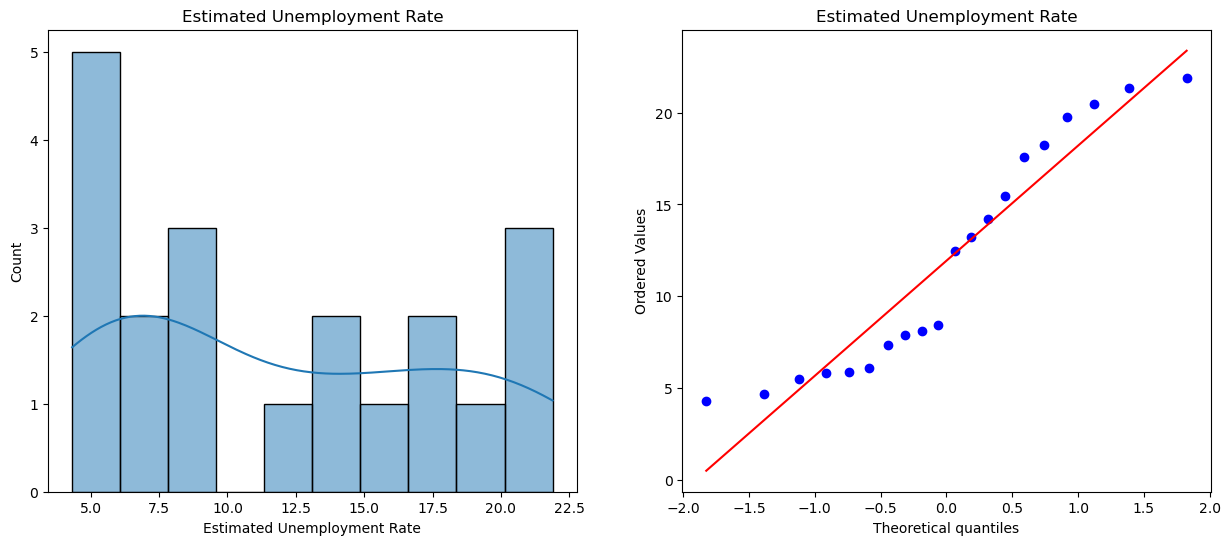

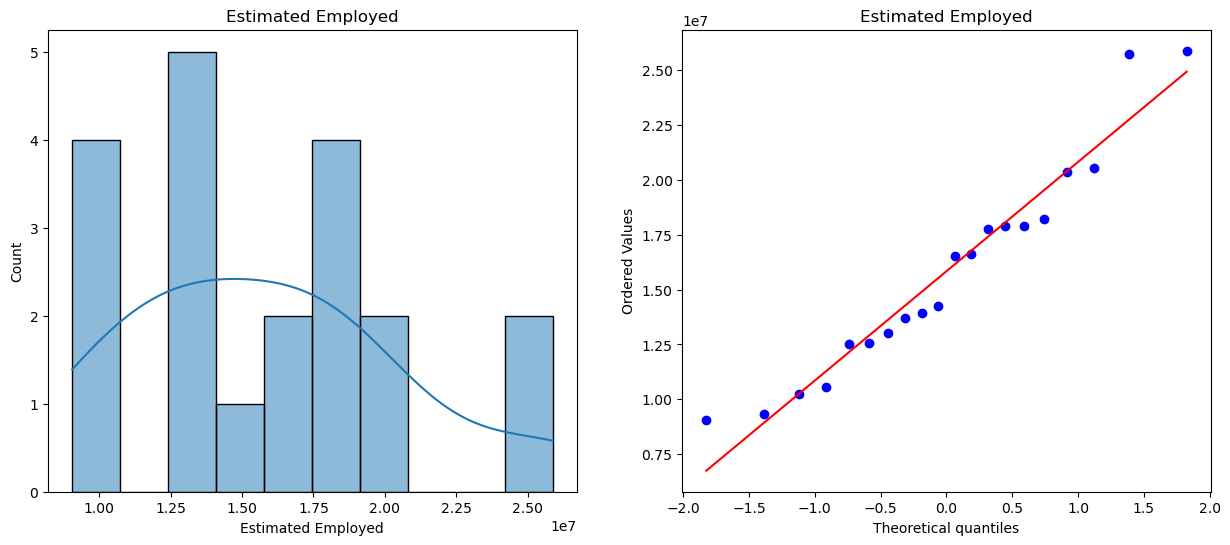

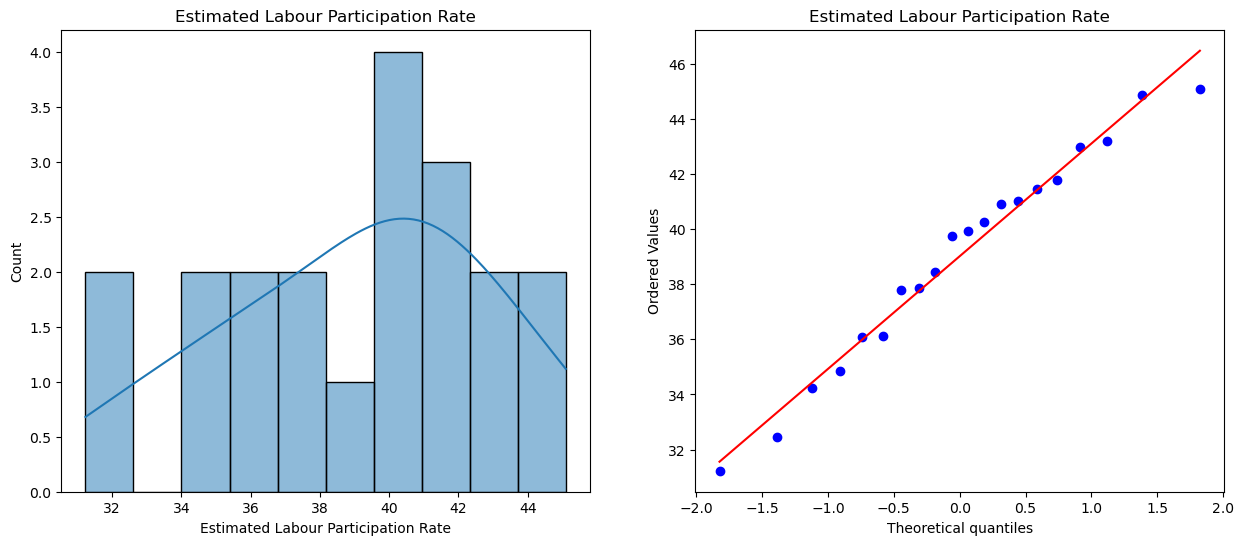

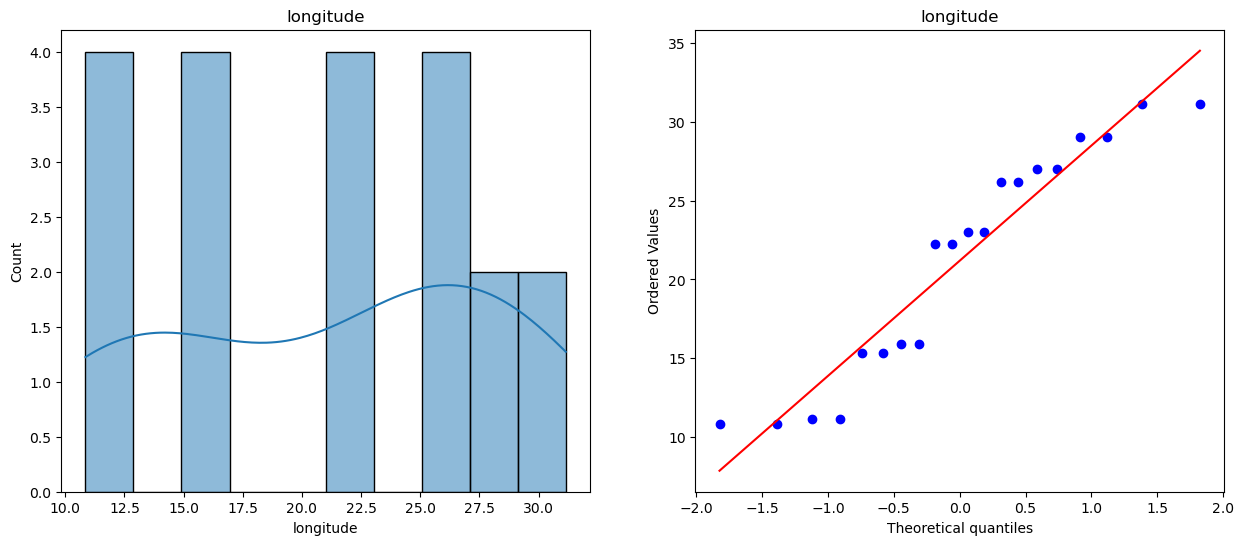

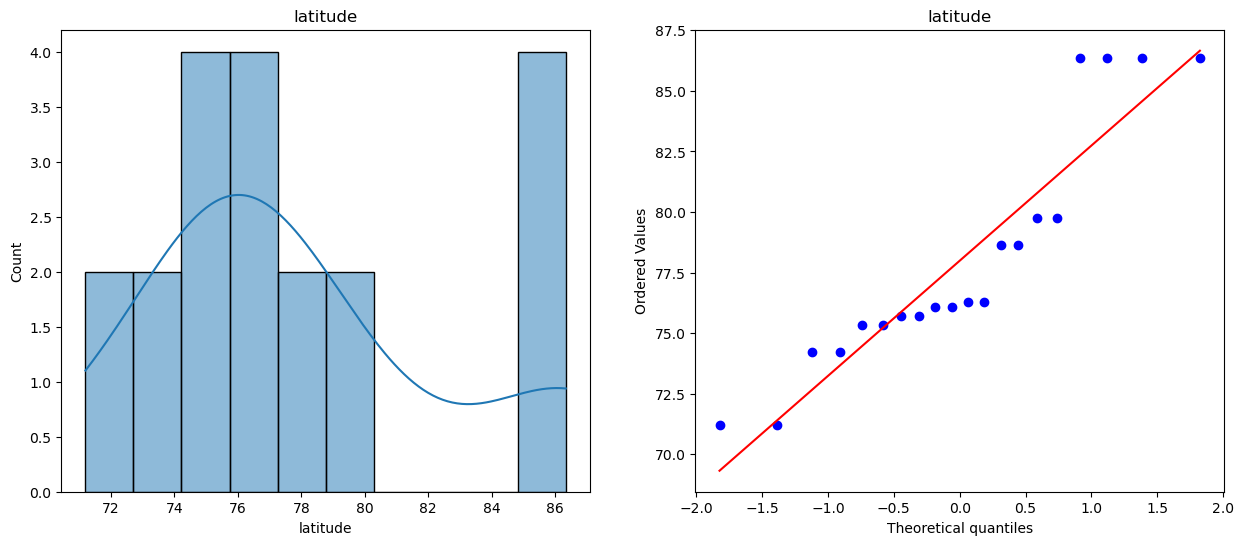

In [38]:
num_cols = df.select_dtypes(include=["int64","float64"])
def plots(num_cols, variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    #num_cols[variable].hist()
    sns.histplot(num_cols[variable], kde=True, bins=10)
    plt.title(variable)
    plt.subplot(1, 2, 2)
    stats.probplot(num_cols[variable], dist="norm", plot=pylab)
    plt.title(variable)
    plt.show()
for i in num_cols.columns:
  plots(num_cols, i)

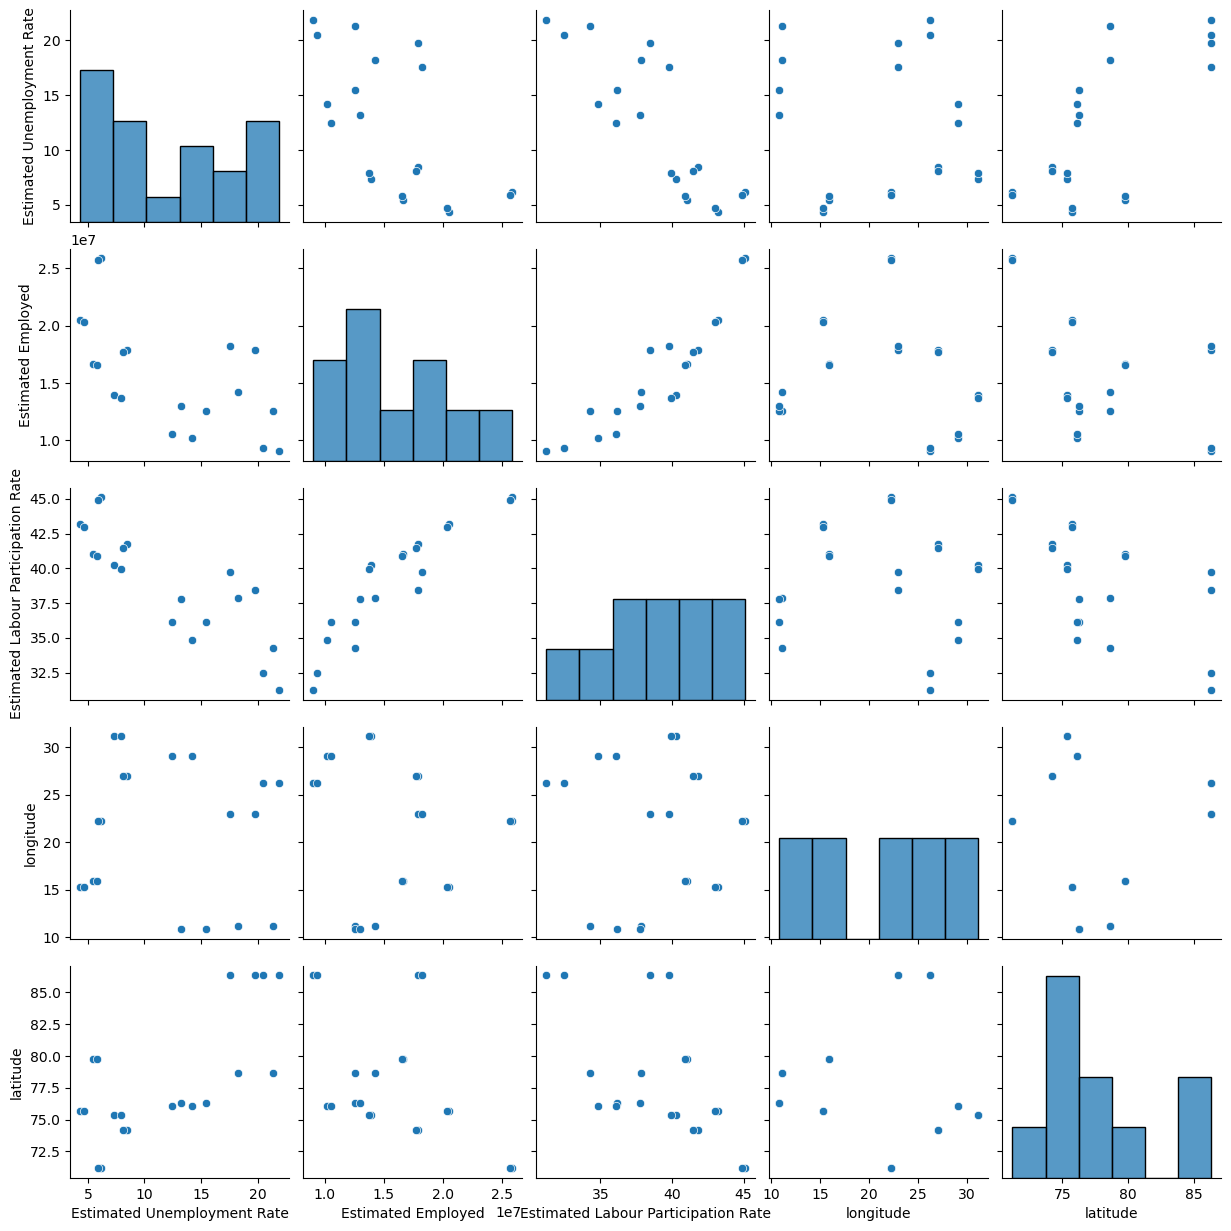

In [43]:
sns.pairplot(df)
plt.show()

C:\Users\srinithi\AppData\Local\Temp\ipykernel_5668\1112548289.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

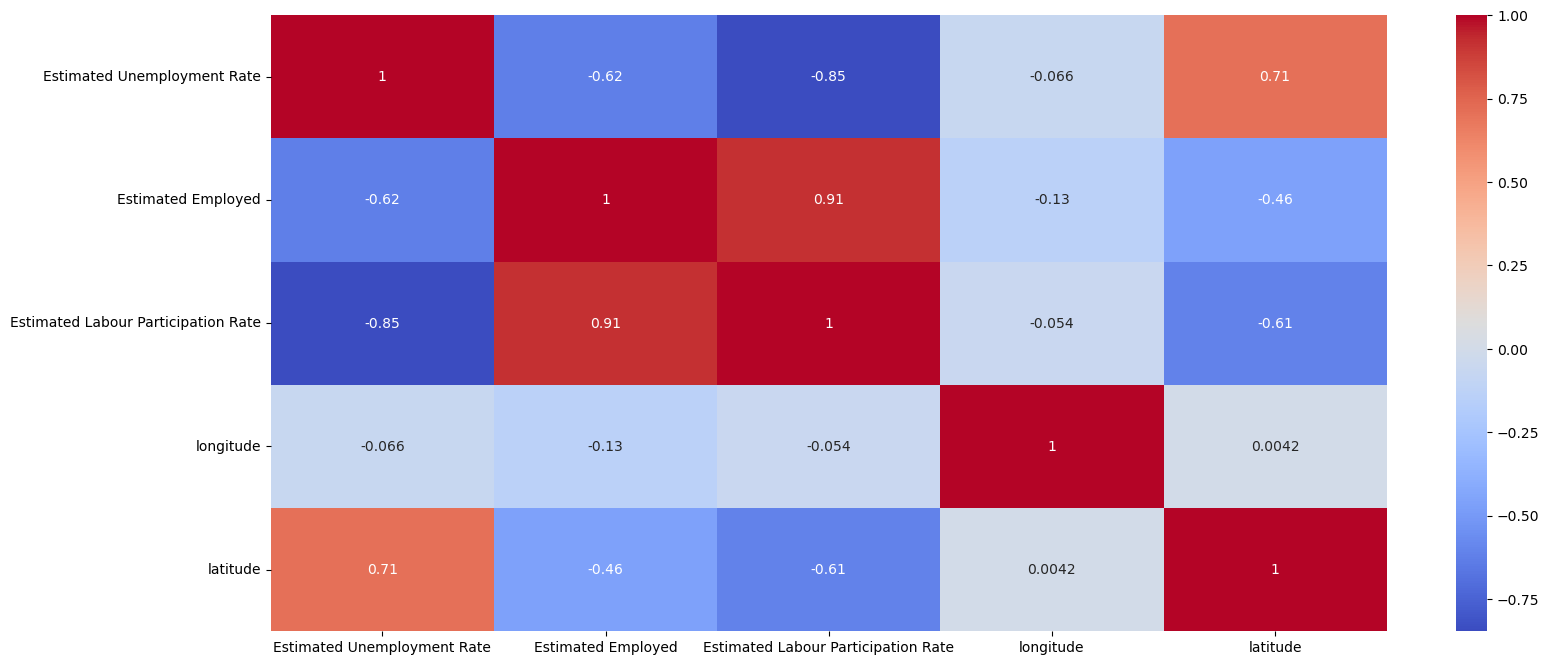

In [44]:
fig, ax = plt.subplots(figsize=(18, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', ax=ax)